In [72]:
import numpy as np
from numpy.random import uniform, randn
from numpy.linalg import norm
import matplotlib.pyplot as plt



# Generate points

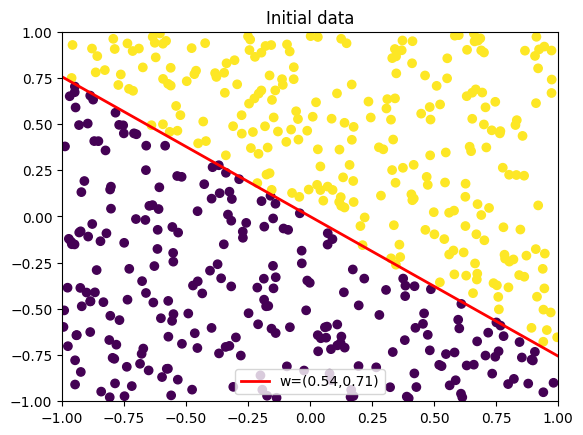

In [73]:
n_points = 500
n_features = 2

w_init = uniform(-1,1,size=2)
X = uniform(-1,1,(n_points,n_features))
y = np.sign(X @ w_init)

def plot_data(X,y,w,title):
    """
    w: weight tuple
    title:dict
    """
    plt.figure()
    plt.title(list(title.keys())[0])
    plt.scatter(X[:,0], X[:,1], c=y)
    slope = -w[0]/w[1]
    abs_range=np.array([-1,1])
    plt.plot(abs_range, slope*abs_range, c='red',lw=2,label=f'{list(title.values())[0]}=({w[0]:.2f},{w[1]:.2f})')
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    plt.legend()

plot_data(X,y,w_init,{'Initial data':"w"})

# Implement SGD

In [74]:
def accuracy(pred, gt):
    return (pred == gt).sum() / len(pred)

def stochastic_gd(X, y, n, init_lr, d=0.1, r=200):
    """
    n: number of iterations 
    init_lr: initial learning rate
    d: how much the learning rate should change at each drop
    r: drop rate (how often the rate should be dropped)
    """
    w = randn(n_features)
    losses = []
    accuracies=[]
    lr=init_lr
    for i in range(n):
            if i%r==0 and i > 0:
                lr*=d
            k = np.random.randint(0, len(y))
            x_k, y_k = X[k,:], y[k]

            w += lr * 2 * (y_k-w @ x_k.T) * x_k
            w /= norm(w)

            y_pred = np.sign(X @ w.T)
            accuracies.append(accuracy(y_pred, y))
            loss = np.mean((y - w @ X.T)**2)
            losses.append(loss)
    return w, losses, accuracies



# Testing the algorithm

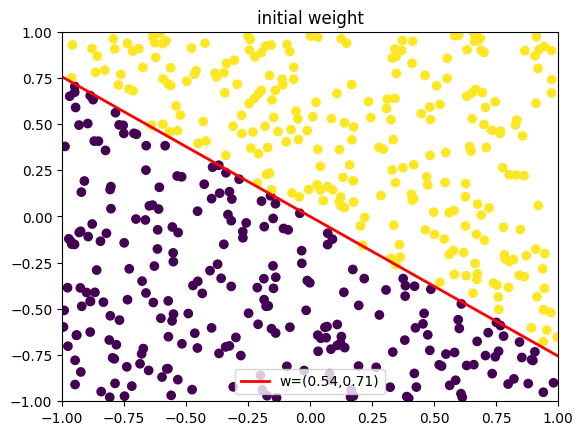

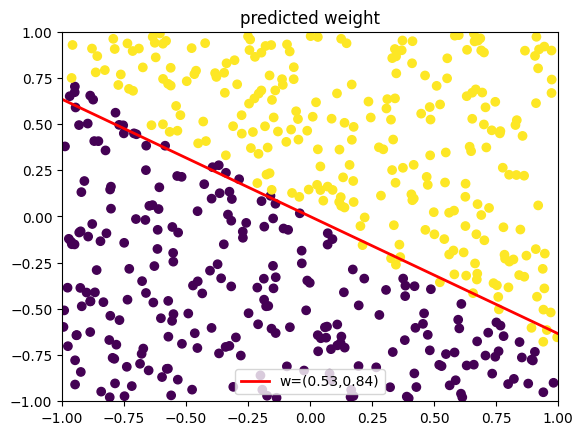

In [75]:
init_lr = 0.1
epochs = 1000
runs = 20

all_w = np.zeros((runs, 2))
all_losses = np.zeros((runs, epochs))
all_accuracies = np.zeros((runs, epochs))

for run in range(runs):
    w_pred, losses, accuracies = stochastic_gd(X, y, n=epochs,init_lr=init_lr)
    all_w[run] = w_pred
    all_losses[run] = losses
    all_accuracies[run] = accuracies
plot_data(X,y,w_init,{'initial weight':'w'})
plot_data(X,y,all_w.mean(axis=0),{'predicted weight':"w"})

The prediction is pretty good, as we can see the value of w doesn't change a lot.
# Noising 

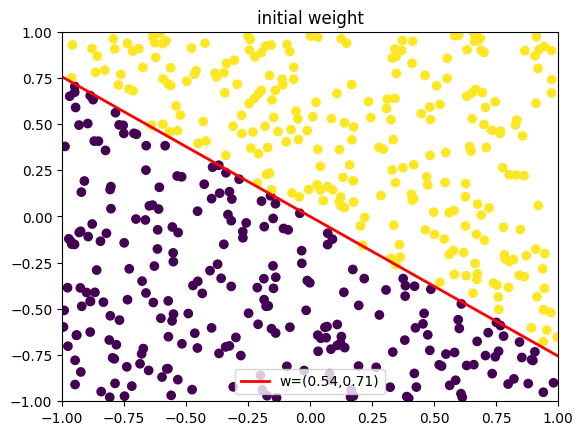

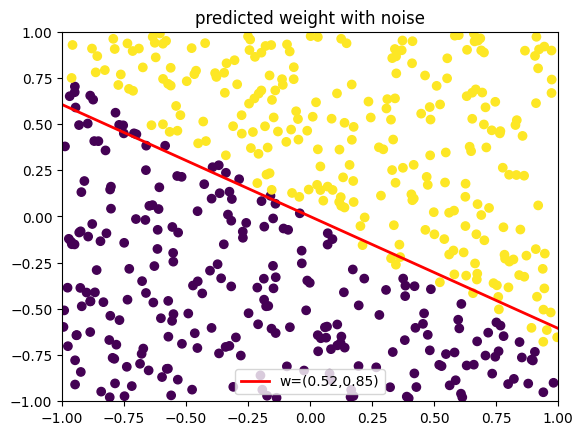

In [76]:
init_lr = 0.1
epochs = 1000
runs = 20

all_w_noisy = np.zeros((runs, 2))
all_losses_noisy = np.zeros((runs, epochs))
all_accuracies_noisy = np.zeros((runs, epochs))

for run in range(runs):
    w_pred, losses, accuracies = stochastic_gd(X, y, n=epochs,init_lr=init_lr)
    all_w_noisy[run] = w_pred
    all_losses_noisy[run] = losses
    all_accuracies_noisy[run] = accuracies
plot_data(X,y,w_init,{'initial weight':'w'})
plot_data(X,y,all_w_noisy.mean(axis=0),{'predicted weight with noise':"w"})

Again, the addition of noise doesn't affect the performance of our algorithm in a nefarious way. 

In [77]:
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
   
X = breast_cancer_wisconsin_diagnostic.data.features.copy()
X = X.to_numpy()

y = breast_cancer_wisconsin_diagnostic.data.targets.copy() 
y['Diagnosis'] = y['Diagnosis'].map({"M": -1, "B": 1})
y = y.to_numpy().squeeze()

X = scaler.fit_transform(X)


In [78]:
print(X_train.shape, y_train.shape)

(398, 30) (398,)


0.8658165202108964


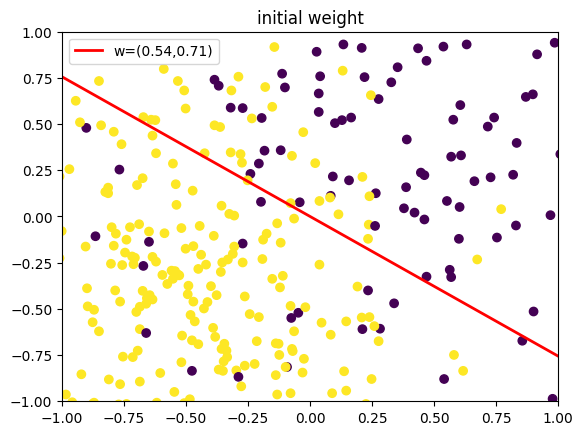

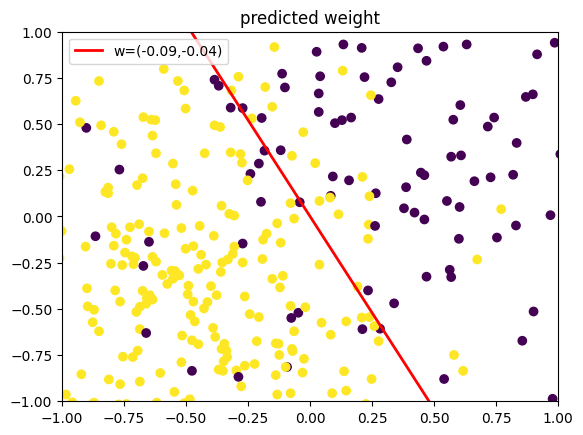

In [79]:
n_features = X.shape[1]
init_lr = 0.001
epochs = 1500
runs = 5

all_w = np.zeros((runs, n_features))
all_losses = np.zeros((runs, epochs))
all_accuracies = np.zeros((runs, epochs))

for run in range(runs):
    w_pred, losses, accuracies = stochastic_gd(X, y, n=epochs,init_lr=init_lr)
    all_w[run] = w_pred
    all_losses[run] = losses
    all_accuracies[run] = accuracies
plot_data(X,y,w_init,{'initial weight':'w'})
plot_data(X,y,all_w.mean(axis=0),{'predicted weight':"w"})
print(all_accuracies.mean())

The prediction is not as good this time. This is probably due to the fact that the separation is not as clear cut as in our test dataset